In [ ]:
!pip install pytimekr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pytimekr: filename=pytimekr-0.1.0-py3-none-any.whl size=7941 sha256=c916a254146d4e9ac0b27d7c9a28c95c16d73364ec17ba20fd2025d19b8a5d31
  Stored in directory: /root/.cache/pip/wheels/7c/54/31/d099bce210ce51c45eeb97e149699dedc66c78eb84c01be9c2
Successfully built pytimekr


### 라이브러리 호출

In [ ]:
import requests
import pandas as pd
import numpy as np
from pytimekr import pytimekr
import datetime

### 데이터 웹크롤링(도시간 소요시간 Open API)
* API에서 제공하는 2017년부터 2022년 특수일 도시간 소요시간 데이터 크롤링 진행

In [ ]:
data = []
url = 'http://data.ex.co.kr/openapi/specialAnal/intercityLeadTime'
page = {2017:3, 2018:6, 2019:5,2020:6,2021:6,2022:4}

for year in range(2017, 2023):
  for pagenum in range(page[year]):
    params = {'key': '', 
            'type':'json', 
            'iYear':str(year), 
            'iStUnitCode':'101',
            'iEdUnitCode':'140',
            'numOfRows':'99',
            'pageNo':{str(pagenum)},
            }
    response = requests.get(url, params)
    data += response.json()['intercityLeadTimeLists']

df = pd.DataFrame(data)
df

,stdHour,iYear,iStUnitCode,iEdUnitCode,stdYear,sphlDfttNm,sphlDfttCode,sphlDfttScopTypeNm,sphlDfttScopTypeCode,stUnitNm,stUnitCode,edUnitNm,edUnitCode,dirNm,dirCode,trtm,message,code
0,00,None,None,None,2017,추석,3,D-3,1,서울,101,부산,140,귀성방향,1,274.466000000000000000000000,None,None
1,01,None,None,None,2017,추석,3,D-3,1,서울,101,부산,140,귀성방향,1,260.141000000000000000000000,None,None
2,02,None,None,None,2017,추석,3,D-3,1,서울,101,부산,140,귀성방향,1,269.225000000000000000000000,None,None
3,03,None,None,None,2017,추석,3,D-3,1,서울,101,부산,140,귀성방향,1,263.721666666666666666666666,None,None
4,04,None,None,None,2017,추석,3,D-3,1,서울,101,부산,140,귀성방향,1,264.088666666666666666666666,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2639,19,None,None,None,2022,설날,2,D+3,7,서울,101,부산,140,귀성방향,1,265.266500000000000000000000,None,None
2640,20,None,None,None,2022,설날,2,D+3,7,서울,101,부산,140,귀성방향,1,271.666000000000000000000000,None,None
2641,21,None,None,None,2022,설날,2,D+3,7,서울,101,부산,140,귀성방향,1,270.850000000000000000000000,None,None
2642,22,None,None,None,2022,설날,2,D+3,7,서울,101,부산,140,귀성방향,1,270.016000000000000000000000,None,None


In [ ]:
# 크롤링 데이터 저장
df.to_csv('도시간 소요시간.csv',encoding='UTF-8-sig',index=False)

In [124]:
# 저장 데이터 호출
df = pd.read_csv('/content/도시간 소요시간.csv')

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   stdHour               2644 non-null   int64  
 1   iYear                 0 non-null      float64
 2   iStUnitCode           0 non-null      float64
 3   iEdUnitCode           0 non-null      float64
 4   stdYear               2644 non-null   int64  
 5   sphlDfttNm            2644 non-null   object 
 6   sphlDfttCode          2644 non-null   int64  
 7   sphlDfttScopTypeNm    2644 non-null   object 
 8   sphlDfttScopTypeCode  2644 non-null   int64  
 9   stUnitNm              2644 non-null   object 
 10  stUnitCode            2644 non-null   int64  
 11  edUnitNm              2644 non-null   object 
 12  edUnitCode            2644 non-null   int64  
 13  dirNm                 2644 non-null   object 
 14  dirCode               2644 non-null   int64  
 15  trtm                 

### 데이터 전처리

In [126]:
# 크롤링 페이지의 중복 데이터 제거
df = df.drop_duplicates()

In [127]:
df.stdYear = df.stdYear.astype(str)

In [128]:
df.dtypes

stdHour                   int64
iYear                   float64
iStUnitCode             float64
iEdUnitCode             float64
stdYear                  object
sphlDfttNm               object
sphlDfttCode              int64
sphlDfttScopTypeNm       object
sphlDfttScopTypeCode      int64
stUnitNm                 object
stUnitCode                int64
edUnitNm                 object
edUnitCode                int64
dirNm                    object
dirCode                   int64
trtm                    float64
message                 float64
code                    float64
dtype: object

### Feature Engineering
* 변수(연휴 기간) 추가

In [129]:
df.loc[df['stdYear']=='2022','sphlDfttNm'].unique()

array(['연말연시', '설날'], dtype=object)

In [130]:
df['week_holiday'] = 0
df.loc[(df['stdYear']=='2017') & (df['sphlDfttNm'] == '추석') , 'week_holiday'] = 10

df.loc[(df['stdYear']=='2018') & (df['sphlDfttNm'] == '연말연시') , 'week_holiday'] = 3
df.loc[(df['stdYear']=='2018') & (df['sphlDfttNm'] == '설날') , 'week_holiday'] = 4
df.loc[(df['stdYear']=='2018') & (df['sphlDfttNm'] == '추석') , 'week_holiday'] = 5
df.loc[(df['stdYear']=='2019') & (df['sphlDfttNm'] == '연말연시') , 'week_holiday'] = 1
df.loc[(df['stdYear']=='2019') & (df['sphlDfttNm'] == '설날') , 'week_holiday'] = 5
df.loc[(df['stdYear']=='2019') & (df['sphlDfttNm'] == '추석') , 'week_holiday'] = 4
df.loc[(df['stdYear']=='2020') & (df['sphlDfttNm'] == '연말연시') , 'week_holiday'] = 1
df.loc[(df['stdYear']=='2020') & (df['sphlDfttNm'] == '설날') , 'week_holiday'] = 4
df.loc[(df['stdYear']=='2020') & (df['sphlDfttNm'] == '추석') , 'week_holiday'] = 5
df.loc[(df['stdYear']=='2021') & (df['sphlDfttNm'] == '연말연시') , 'week_holiday'] = 3
df.loc[(df['stdYear']=='2021') & (df['sphlDfttNm'] == '설날') , 'week_holiday'] = 4
df.loc[(df['stdYear']=='2021') & (df['sphlDfttNm'] == '추석') , 'week_holiday'] = 5
df.loc[(df['stdYear']=='2022') & (df['sphlDfttNm'] == '연말연시') , 'week_holiday'] = 2
df.loc[(df['stdYear']=='2022') & (df['sphlDfttNm'] == '설날') , 'week_holiday'] = 5


In [131]:
df['week_holiday'].unique()

array([10,  3,  4,  5,  1,  2])

* 날짜 데이터 추가

In [132]:
df['date'] = datetime.datetime.now()
df.loc[(df['stdYear']=='2017') & (df['sphlDfttNm'] == '추석') , 'date'] = pytimekr.chuseok(2017)
df.loc[(df['stdYear']=='2018') & (df['sphlDfttNm'] == '연말연시') , 'date'] = datetime.date(2018, 1, 1)
df.loc[(df['stdYear']=='2018') & (df['sphlDfttNm'] == '설날') , 'date'] = pytimekr.lunar_newyear(2018)
df.loc[(df['stdYear']=='2018') & (df['sphlDfttNm'] == '추석') , 'date'] = pytimekr.chuseok(2018)
df.loc[(df['stdYear']=='2019') & (df['sphlDfttNm'] == '연말연시') , 'date'] = datetime.date(2019, 1, 1)
df.loc[(df['stdYear']=='2019') & (df['sphlDfttNm'] == '설날') , 'date'] = pytimekr.lunar_newyear(2019)
df.loc[(df['stdYear']=='2019') & (df['sphlDfttNm'] == '추석') , 'date'] = pytimekr.chuseok(2019)
df.loc[(df['stdYear']=='2020') & (df['sphlDfttNm'] == '연말연시') , 'date'] = datetime.date(2020, 1, 1)
df.loc[(df['stdYear']=='2020') & (df['sphlDfttNm'] == '설날') , 'date'] = pytimekr.lunar_newyear(2020)
df.loc[(df['stdYear']=='2020') & (df['sphlDfttNm'] == '추석') , 'date'] = pytimekr.chuseok(2020)
df.loc[(df['stdYear']=='2021') & (df['sphlDfttNm'] == '연말연시') , 'date'] = datetime.date(2021, 1, 1)
df.loc[(df['stdYear']=='2021') & (df['sphlDfttNm'] == '설날') , 'date'] = pytimekr.lunar_newyear(2021)
df.loc[(df['stdYear']=='2021') & (df['sphlDfttNm'] == '추석') , 'date'] = pytimekr.chuseok(2021)
df.loc[(df['stdYear']=='2022') & (df['sphlDfttNm'] == '연말연시') , 'date'] = datetime.date(2022, 1, 1)
df.loc[(df['stdYear']=='2022') & (df['sphlDfttNm'] == '설날') , 'date'] = pytimekr.lunar_newyear(2022)

In [133]:
df.date.unique()

array([datetime.date(2017, 10, 4), datetime.date(2018, 1, 1),
       datetime.date(2018, 2, 16), datetime.date(2018, 9, 24),
       datetime.date(2019, 1, 1), datetime.date(2019, 2, 5),
       datetime.date(2019, 9, 13), datetime.date(2020, 1, 1),
       datetime.date(2020, 1, 25), datetime.date(2020, 10, 1),
       datetime.date(2021, 1, 1), datetime.date(2021, 2, 12),
       datetime.date(2021, 9, 21), datetime.date(2022, 1, 1),
       datetime.date(2022, 2, 1)], dtype=object)

In [134]:
# D-Day 제외 나머지 일자 데이터 정리
df.loc[df['sphlDfttScopTypeNm'] == 'D-3', 'date'] = df.loc[df['sphlDfttScopTypeNm'] == 'D-3', 'date'] - datetime.timedelta(days=3)
df.loc[df['sphlDfttScopTypeNm'] == 'D-2', 'date'] = df.loc[df['sphlDfttScopTypeNm'] == 'D-2', 'date'] - datetime.timedelta(days=2)
df.loc[df['sphlDfttScopTypeNm'] == 'D-1', 'date'] = df.loc[df['sphlDfttScopTypeNm'] == 'D-1', 'date'] - datetime.timedelta(days=1)
df.loc[df['sphlDfttScopTypeNm'] == 'D+3', 'date'] = df.loc[df['sphlDfttScopTypeNm'] == 'D+3', 'date'] + datetime.timedelta(days=3)
df.loc[df['sphlDfttScopTypeNm'] == 'D+2', 'date'] = df.loc[df['sphlDfttScopTypeNm'] == 'D+2', 'date'] + datetime.timedelta(days=2)
df.loc[df['sphlDfttScopTypeNm'] == 'D+1', 'date'] = df.loc[df['sphlDfttScopTypeNm'] == 'D+1', 'date'] + datetime.timedelta(days=1)

In [135]:
df.date.unique()

array([datetime.date(2017, 10, 1), datetime.date(2017, 10, 2),
       datetime.date(2017, 10, 3), datetime.date(2017, 10, 4),
       datetime.date(2017, 10, 5), datetime.date(2017, 10, 6),
       datetime.date(2017, 10, 7), datetime.date(2018, 1, 1),
       datetime.date(2018, 1, 2), datetime.date(2018, 1, 3),
       datetime.date(2018, 1, 4), datetime.date(2018, 2, 13),
       datetime.date(2018, 2, 14), datetime.date(2018, 2, 15),
       datetime.date(2018, 2, 16), datetime.date(2018, 2, 17),
       datetime.date(2018, 2, 18), datetime.date(2018, 2, 19),
       datetime.date(2018, 9, 21), datetime.date(2018, 9, 22),
       datetime.date(2018, 9, 23), datetime.date(2018, 9, 24),
       datetime.date(2018, 9, 25), datetime.date(2018, 9, 26),
       datetime.date(2018, 9, 27), datetime.date(2019, 1, 1),
       datetime.date(2019, 1, 2), datetime.date(2019, 1, 3),
       datetime.date(2019, 1, 4), datetime.date(2019, 2, 2),
       datetime.date(2019, 2, 3), datetime.date(2019, 2, 4),
   

* 년도, 월, 일, 시간 datetime 형태로 변환

In [136]:
df['date'] = pd.to_datetime((df['date'].astype(str) +'-') + df['stdHour'].astype(str), format='%Y-%m-%d-%H')

### 기상청 오픈 데이터(종관기상관측) 호출 및 전처리

In [137]:
w_2017 = pd.read_csv('/content/weather_2017.csv', sep=',', encoding='cp949')
w_2018 = pd.read_csv('/content/weather_2018.csv', sep=',', encoding='cp949')
w_2019 = pd.read_csv('/content/weather_2019.csv', sep=',', encoding='cp949')
w_2020 = pd.read_csv('/content/weather_2020.csv', sep=',', encoding='cp949')
w_2021 = pd.read_csv('/content/weather_2021.csv', sep=',', encoding='cp949')
w_2022 = pd.read_csv('/content/weather_2022.csv', sep=',', encoding='cp949')

df_list = [w_2017, w_2018, w_2019, w_2020, w_2021, w_2022]
weather = pd.concat(df_list)
weather

,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그
0,133,대전,2017-01-01 00:00,1.1,0.0,NaN,9.0
1,133,대전,2017-01-01 01:00,1.2,0.0,NaN,NaN
2,133,대전,2017-01-01 02:00,1.0,0.0,NaN,NaN
3,133,대전,2017-01-01 03:00,0.8,0.0,NaN,NaN
4,133,대전,2017-01-01 04:00,0.3,0.0,NaN,NaN
...,...,...,...,...,...,...,...
5981,133,대전,2022-09-07 05:00,16.0,NaN,NaN,NaN
5982,133,대전,2022-09-07 06:00,15.9,NaN,NaN,NaN
5983,133,대전,2022-09-07 07:00,16.5,NaN,NaN,NaN
5984,133,대전,2022-09-07 08:00,18.7,NaN,NaN,NaN


In [138]:
# datetime 형태로 변환
weather['일시'] = pd.to_datetime(weather['일시'], format='%Y-%m-%d %H:%M')
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49810 entries, 0 to 5985
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   지점         49810 non-null  int64         
 1   지점명        49810 non-null  object        
 2   일시         49810 non-null  datetime64[ns]
 3   기온(°C)     49806 non-null  float64       
 4   기온 QC플래그   16338 non-null  float64       
 5   강수량(mm)    5361 non-null   float64       
 6   강수량 QC플래그  11096 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 3.0+ MB


In [139]:
# 날짜 변수 컬럼명 일치화
weather.rename(columns={'일시':'date'}, inplace=True)
weather.head()

,지점,지점명,date,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그
0,133,대전,2017-01-01 00:00:00,1.1,0.0,NaN,9.0
1,133,대전,2017-01-01 01:00:00,1.2,0.0,NaN,NaN
2,133,대전,2017-01-01 02:00:00,1.0,0.0,NaN,NaN
3,133,대전,2017-01-01 03:00:00,0.8,0.0,NaN,NaN
4,133,대전,2017-01-01 04:00:00,0.3,0.0,NaN,NaN


* 도시간 소요시간 데이터, 날씨 데이터 합치기

In [140]:
temp = pd.merge(df, weather, how='inner', on='date')
temp.head()

,stdHour,iYear,iStUnitCode,iEdUnitCode,stdYear,sphlDfttNm,sphlDfttCode,sphlDfttScopTypeNm,sphlDfttScopTypeCode,stUnitNm,...,message,code,week_holiday,date,지점,지점명,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그
0,0,NaN,NaN,NaN,2017,추석,3,D-3,1,서울,...,NaN,NaN,10,2017-10-01 00:00:00,133,대전,15.5,0.0,NaN,NaN
1,1,NaN,NaN,NaN,2017,추석,3,D-3,1,서울,...,NaN,NaN,10,2017-10-01 01:00:00,133,대전,14.7,0.0,NaN,NaN
2,2,NaN,NaN,NaN,2017,추석,3,D-3,1,서울,...,NaN,NaN,10,2017-10-01 02:00:00,133,대전,14.3,0.0,NaN,NaN
3,3,NaN,NaN,NaN,2017,추석,3,D-3,1,서울,...,NaN,NaN,10,2017-10-01 03:00:00,133,대전,13.9,0.0,NaN,NaN
4,4,NaN,NaN,NaN,2017,추석,3,D-3,1,서울,...,NaN,NaN,10,2017-10-01 04:00:00,133,대전,13.7,0.0,NaN,NaN


* 결측치 처리

In [141]:
temp.isna().sum()

stdHour                    0
iYear                   2050
iStUnitCode             2050
iEdUnitCode             2050
stdYear                    0
sphlDfttNm                 0
sphlDfttCode               0
sphlDfttScopTypeNm         0
sphlDfttScopTypeCode       0
stUnitNm                   0
stUnitCode                 0
edUnitNm                   0
edUnitCode                 0
dirNm                      0
dirCode                    0
trtm                      14
message                 2050
code                    2050
week_holiday               0
date                       0
지점                         0
지점명                        0
기온(°C)                     0
기온 QC플래그                1368
강수량(mm)                 1887
강수량 QC플래그               1557
dtype: int64

In [142]:
# 날씨 데이터 결측치 처리(강수량 -> 결측데이터 9이면 linear하게 처리)
temp.loc[temp['강수량 QC플래그'] != 9, '강수량(mm)'] = 0
temp['강수량(mm)'].interpolate(method='linear', inplace=True)

In [143]:
temp.isna().sum()

stdHour                    0
iYear                   2050
iStUnitCode             2050
iEdUnitCode             2050
stdYear                    0
sphlDfttNm                 0
sphlDfttCode               0
sphlDfttScopTypeNm         0
sphlDfttScopTypeCode       0
stUnitNm                   0
stUnitCode                 0
edUnitNm                   0
edUnitCode                 0
dirNm                      0
dirCode                    0
trtm                      14
message                 2050
code                    2050
week_holiday               0
date                       0
지점                         0
지점명                        0
기온(°C)                     0
기온 QC플래그                1368
강수량(mm)                    0
강수량 QC플래그               1557
dtype: int64

In [144]:
# 의미 없는 변수 제외하고 사용할 변수 선택
temp = temp[['stdHour','stdYear','sphlDfttNm','sphlDfttScopTypeNm','week_holiday','trtm','기온(°C)','강수량(mm)']]
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2050 entries, 0 to 2049
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stdHour             2050 non-null   int64  
 1   stdYear             2050 non-null   object 
 2   sphlDfttNm          2050 non-null   object 
 3   sphlDfttScopTypeNm  2050 non-null   object 
 4   week_holiday        2050 non-null   int64  
 5   trtm                2036 non-null   float64
 6   기온(°C)              2050 non-null   float64
 7   강수량(mm)             2050 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 144.1+ KB


In [145]:
# target 값이 결측인 행 제거
temp.dropna(axis=0, inplace=True)

In [146]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2036 entries, 0 to 2049
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stdHour             2036 non-null   int64  
 1   stdYear             2036 non-null   object 
 2   sphlDfttNm          2036 non-null   object 
 3   sphlDfttScopTypeNm  2036 non-null   object 
 4   week_holiday        2036 non-null   int64  
 5   trtm                2036 non-null   float64
 6   기온(°C)              2036 non-null   float64
 7   강수량(mm)             2036 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 143.2+ KB


### 데이터 분할

In [147]:
target = 'trtm'
x = temp.drop(target, axis=1)
y = temp[target]
display(x.head())
display(y.head())

,stdHour,stdYear,sphlDfttNm,sphlDfttScopTypeNm,week_holiday,기온(°C),강수량(mm)
0,0,2017,추석,D-3,10,15.5,0.0
1,1,2017,추석,D-3,10,14.7,0.0
2,2,2017,추석,D-3,10,14.3,0.0
3,3,2017,추석,D-3,10,13.9,0.0
4,4,2017,추석,D-3,10,13.7,0.0


0    274.466000
1    260.141000
2    269.225000
3    263.721667
4    264.088667
Name: trtm, dtype: float64

### 가변수화

In [148]:
x = pd.get_dummies(x, columns=['stdYear', 'sphlDfttNm', 'sphlDfttScopTypeNm'], drop_first=True)
x.head()

,stdHour,week_holiday,기온(°C),강수량(mm),stdYear_2018,stdYear_2019,stdYear_2020,stdYear_2021,stdYear_2022,sphlDfttNm_연말연시,sphlDfttNm_추석,sphlDfttScopTypeNm_D+1,sphlDfttScopTypeNm_D+2,sphlDfttScopTypeNm_D+3,sphlDfttScopTypeNm_D-1,sphlDfttScopTypeNm_D-2,sphlDfttScopTypeNm_D-3
0,0,10,15.5,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,1,10,14.7,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,2,10,14.3,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,3,10,13.9,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,4,10,13.7,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [149]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=, random_state=)

## 랜덤포레스트

In [152]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import *

In [153]:
params = {'max_depth':range(2,17)}

model = GridSearchCV(RandomForestRegressor(),params, cv=5)
model.fit(x_train,y_train)
result = pd.DataFrame(model.cv_results_)

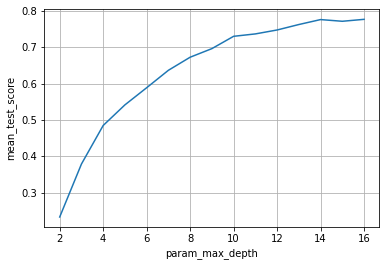

In [154]:
sns.lineplot(x='param_max_depth', y='mean_test_score', data=result)
plt.grid()
plt.show()

In [155]:
params = {'n_estimators':range(50,150,10)}

model = GridSearchCV(RandomForestRegressor(),params, cv=5)
model.fit(x_train,y_train)
result = pd.DataFrame(model.cv_results_)

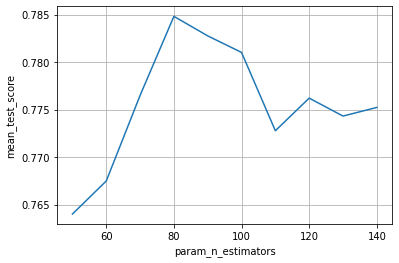

In [156]:
sns.lineplot(x='param_n_estimators', y='mean_test_score', data=result)
plt.grid()
plt.show()

In [ ]:
model = RandomForestRegressor(max_depth=16)
model.fit(x_train,y_train)
pred = model.predict(x_val)

In [ ]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_val, pred))
print(mean_squared_error(y_val, pred, squared=False))
print(mean_absolute_error(y_val, pred))
print(mean_absolute_percentage_error(y_val, pred))

644.5863429656857
25.388705027348003
17.135099967933087
0.05763662709975207


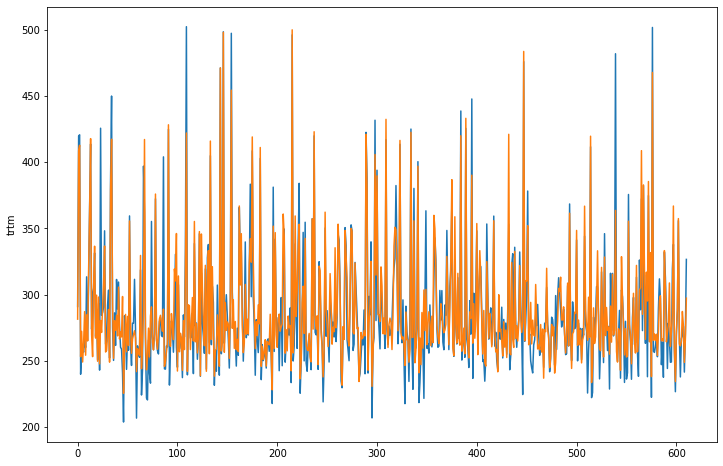

In [161]:
plt.rcParams['figure.figsize'] = 12, 8
sns.lineplot(x=range(len(y_val)), y=y_val)
sns.lineplot(x=range(len(y_val)), y=pred)

## XGB

In [162]:
from xgboost import XGBRegressor

In [ ]:
params = {'max_depth':range(2,17,2)}

model = GridSearchCV(XGBRegressor(),params,cv=5)
model.fit(x_train,y_train)
result = model.cv_results_

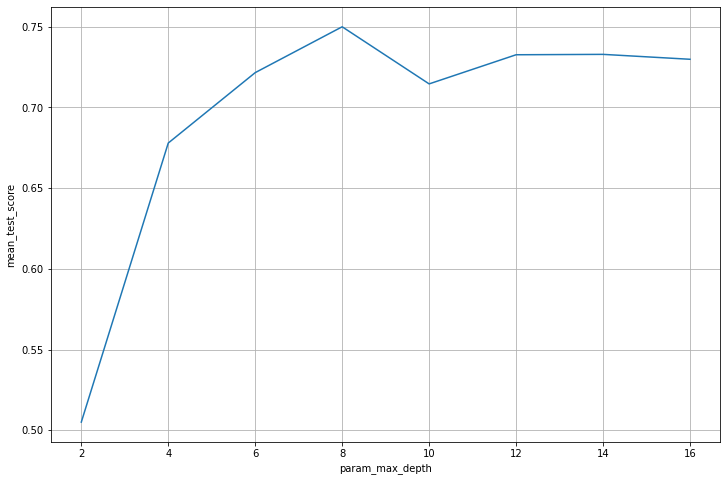

In [164]:
sns.lineplot(x='param_max_depth', y='mean_test_score', data=result)
plt.grid()
plt.show()

In [ ]:
params = {'n_estimators':range(10,150,10)}

model = GridSearchCV(XGBRegressor(max_depth=),params,cv=5)
model.fit(x_train,y_train)
result = model.cv_results_

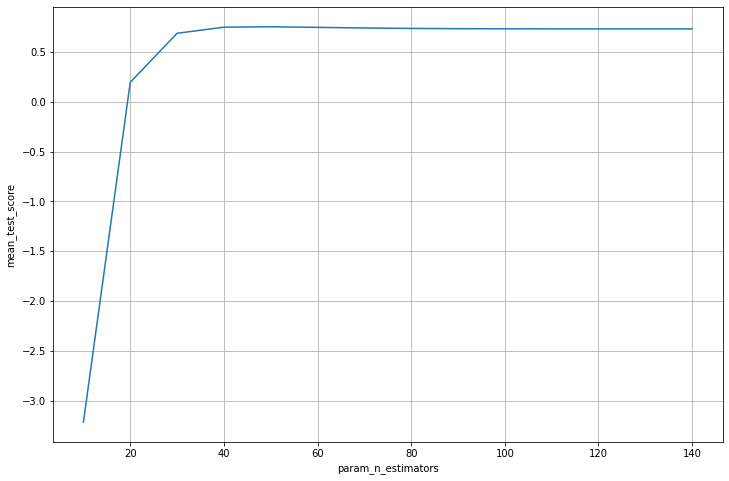

In [166]:
sns.lineplot(x='param_n_estimators', y='mean_test_score', data=result)
plt.grid()
plt.show()

In [ ]:
params = {'learning_rate':np.linspace(0.01,0.2,20)}

model = GridSearchCV(XGBRegressor(max_depth=),params,cv=5)
model.fit(x_train,y_train)
result = model.cv_results_

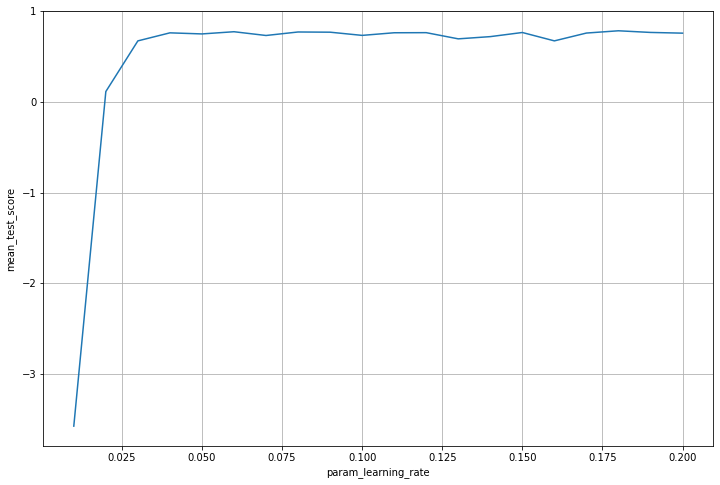

In [168]:
sns.lineplot(x='param_learning_rate', y='mean_test_score', data=result)
plt.grid()
plt.show()

In [169]:
model = XGBRegressor(max_depth=, learning_rate = )
model.fit(x_train,y_train)
pred = model.predict(x_val)

[11:36:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [171]:
print(mean_squared_error(y_val, pred))
print(mean_squared_error(y_val, pred, squared=False))
print(mean_absolute_error(y_val, pred))
print(mean_absolute_percentage_error(y_val, pred))

321.5430247439114
17.931620806383105
11.961527729566773
0.04095753230920421


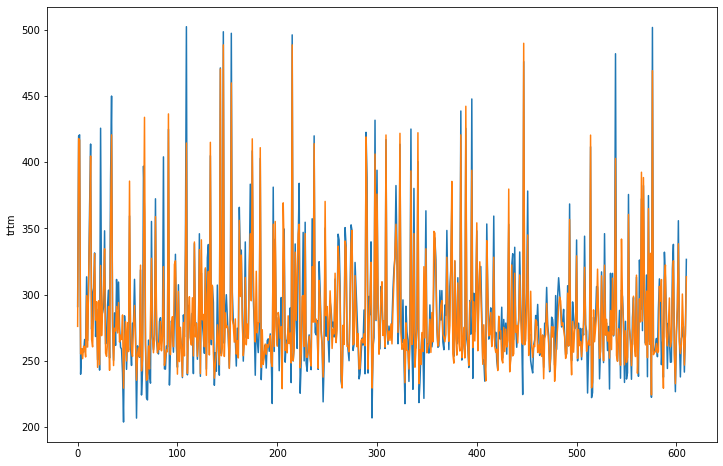

In [170]:
sns.lineplot(x=range(len(y_val)), y=y_val)
sns.lineplot(x=range(len(y_val)), y=pred)
plt.show()

In [ ]:
# 기온 강수량은 대전 기준

### 22.09.09 12시 소요 시간(서울TG-부산TG) 예측
* 날씨 예보 활용(대전)
* stdHour(시):12
* week_holiday(연휴기간):4
* stdYear(년):2022
* sphldFttNm(특정일구분):추석
* sphlDfttScopTypeNm(특정일기준구분):D-1

In [159]:
target = {
    'stdHour':12,'week_holiday':4,'기온(°C)':26.0,'강수량(mm)':0.0,
    'stdYear_2018':0, 'stdYear_2019':0,'stdYear_2020':0,'stdYear_2021':0,'stdYear_2022':1,'sphlDfttNm_연말연시':0,'sphlDfttNm_추석':1,
    'sphlDfttScopTypeNm_D+1':0,
    'sphlDfttScopTypeNm_D+2':0,'sphlDfttScopTypeNm_D+3':0,'sphlDfttScopTypeNm_D-1':1,'sphlDfttScopTypeNm_D-2':0,'sphlDfttScopTypeNm_D-3':0
    
    }
target = pd.DataFrame(target,index=[0])
target.head()

,stdHour,week_holiday,기온(°C),강수량(mm),stdYear_2018,stdYear_2019,stdYear_2020,stdYear_2021,stdYear_2022,sphlDfttNm_연말연시,sphlDfttNm_추석,sphlDfttScopTypeNm_D+1,sphlDfttScopTypeNm_D+2,sphlDfttScopTypeNm_D+3,sphlDfttScopTypeNm_D-1,sphlDfttScopTypeNm_D-2,sphlDfttScopTypeNm_D-3
0,12,4,26.0,0.0,0,0,0,0,1,0,1,0,0,0,1,0,0


In [172]:
result = model.predict(target)[0]
result

461.50085

In [182]:
print(str(int(result//60))+'시간 '+str(round(result%60))+'분 소요 예정입니다.')

7시간 42분 소요 예정입니다.
